# Invasive Birds Project
## Notebook 2: An Overview of the Invasive Cavity Nesters
![project banner image](images/Invasive_birds_banner.jpg)

### Getting started: the preliminaries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.options.mode.chained_assignment = None # disable chain assignment warnings
#load and inspect data

birds = pd.read_csv('invasive_birds_final.csv')
birds.head()

,YEAR,COUNTRY,STATE/PROVINCE,SPECIES_CODE,COMMON_NAME,INVASIVE,TOTAL_COUNTED,AVERAGE_COUNTED,LOCATIONS
0,1987,US,NJ,tuftit,Tufted Titmouse,0,6.0,2.00,1
1,1987,US,NJ,houspa,House Sparrow,1,195.0,39.00,1
2,1987,US,NJ,houfin,House Finch,0,38.0,7.60,1
3,1987,US,NJ,eursta,European Starling,1,61.0,12.20,1
4,1987,US,NJ,dowwoo,Downy Woodpecker,0,7.0,1.75,1


### Checking the counts of STATE/PROVINCE by YEAR 

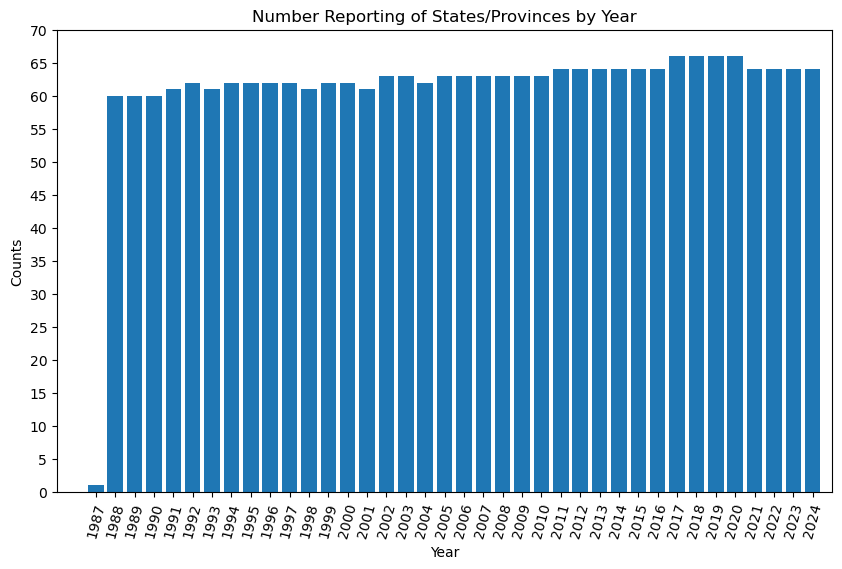

In [2]:
years = birds['YEAR'].unique().tolist()
state_province = birds.groupby(['YEAR'])['STATE/PROVINCE'].nunique()

plt.figure(figsize=(10, 6))
plt.bar(years, state_province, data=birds)
plt.axis([1985, 2025, 0, state_province.max()])
ax = plt.subplot()
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=75, ha="center")
ax.set_yticks(np.arange(0,max(state_province)+5,5))
plt.title('Number Reporting of States/Provinces by Year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.show()

In [3]:
survey_1987 = birds[(birds['YEAR'] == 1987)]
survey_1987['STATE/PROVINCE'].unique()

array(['NJ'], dtype=object)

In [4]:
state_province_updated = birds[(birds['YEAR'] > 1987)]
state_province_updated = state_province_updated.groupby(['YEAR'])['STATE/PROVINCE'].nunique()

state_province_updated.min()

60

In [5]:
state_province_updated.max()

66

#### With only NJ reporting in 1987, but at least 60 states and provinces reporting after that, we'll start with 1988. 

In [6]:
birds_main = birds[(birds['YEAR']> 1987)]
birds_main.head()

,YEAR,COUNTRY,STATE/PROVINCE,SPECIES_CODE,COMMON_NAME,INVASIVE,TOTAL_COUNTED,AVERAGE_COUNTED,LOCATIONS
6,1988,CA,AB,bkcchi,Black-capped Chickadee,0,301.0,6.688889,19
7,1988,CA,PE,haiwoo,Hairy Woodpecker,0,16.0,1.777778,3
8,1988,CA,PE,eursta,European Starling,1,77.0,12.833333,5
9,1988,US,MS,brncre,Brown Creeper,0,15.0,2.500000,2
10,1988,US,MS,bnhnut,Brown-headed Nuthatch,0,21.0,3.000000,3


### Next up, an overview of the invasive species, collectively.

In [7]:
invasive =  birds_main[(birds_main['INVASIVE'] == 1)]
invasive.head()

,YEAR,COUNTRY,STATE/PROVINCE,SPECIES_CODE,COMMON_NAME,INVASIVE,TOTAL_COUNTED,AVERAGE_COUNTED,LOCATIONS
8,1988,CA,PE,eursta,European Starling,1,77.0,12.833333,5
14,1988,CA,PE,houspa,House Sparrow,1,83.0,16.600000,3
20,1988,CA,NS,houspa,House Sparrow,1,1014.0,24.142857,15
21,1988,CA,MB,eursta,European Starling,1,34.0,4.857143,3
22,1988,CA,NS,eursta,European Starling,1,776.0,18.926829,19


### Total counts by year.  

In [284]:
invasive_pivot = pd.pivot_table(invasive,
    values='TOTAL_COUNTED',
    index='YEAR',
    columns='COMMON_NAME',
    aggfunc='sum')

invasive_pivot

COMMON_NAME,Eurasian Tree Sparrow,European Starling,House Sparrow
YEAR,,,
1988,185.0,36055.0,138413.0
1989,667.0,141313.0,345715.0
1990,381.0,131301.0,318422.0
1991,237.0,115567.0,287604.0
1992,95.0,119184.0,267116.0
1993,79.0,133298.0,262106.0
1994,466.0,126033.0,334906.0
1995,711.0,157591.0,340118.0
1996,NaN,140405.0,319057.0


#### There's a NaN for Eurasian Tree Sparrows in 1996. Let's make that a 0.  

In [285]:
# replace NaN and make other adjustments

invasive_pivot['Eurasian Tree Sparrow'].fillna(0, inplace=True)
invasive_pivot.columns.name = None               #remove categories
invasive_pivot = invasive_pivot.reset_index()    #index to columns
invasive_pivot[:10]

,YEAR,Eurasian Tree Sparrow,European Starling,House Sparrow
0,1988,185.0,36055.0,138413.0
1,1989,667.0,141313.0,345715.0
2,1990,381.0,131301.0,318422.0
3,1991,237.0,115567.0,287604.0
4,1992,95.0,119184.0,267116.0
5,1993,79.0,133298.0,262106.0
6,1994,466.0,126033.0,334906.0
7,1995,711.0,157591.0,340118.0
8,1996,0.0,140405.0,319057.0
9,1997,285.0,143011.0,334024.0


### Now for a visual.  

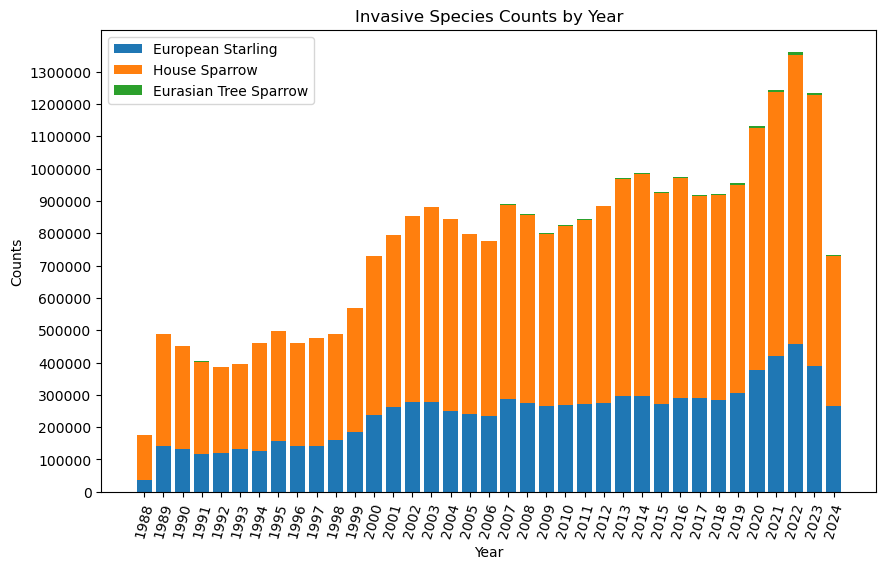

In [126]:
EUST = invasive_pivot['European Starling']
HOSP = invasive_pivot['House Sparrow']
ETSP = invasive_pivot['Eurasian Tree Sparrow']

year = invasive['YEAR'].unique().tolist()

ETSP_bottom = np.add(EUST, HOSP) # bottom value for ETSP section of the bars

max_y = np.max(ETSP_bottom +ETSP) # scale for y_ticks


plt.figure(figsize=(10, 6))
plt.bar(range(len(year)), EUST, label="European Starling")
plt.bar(range(len(year)), HOSP, bottom=EUST, label="House Sparrow")
plt.bar(range(len(year)), ETSP, bottom=ETSP_bottom, label="Eurasian Tree Sparrow")

ax = plt.subplot()
ax.set_xticks(range(len(year)))
ax.set_xticklabels(year, rotation=75, ha='center')
ax.set_yticks(np.arange(0, max_y, step=100000))
ax.ticklabel_format(style='plain', axis="y")
plt.legend()
plt.title('Invasive Species Counts by Year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.show()


#### It looks like there have been fewer reported House Sparrows and European Starlings for the last two years, with a particularly sharp decline for 2024.
If this reflects reality, it's really good news for the native cavity nesters. *However*, that's not the only possible explanation for the sudden decline of *reported* counts. Let's see if there's more to the story. This will require revisiting the checkpoint dataset that was made in Notebook 1 in order to get the yearly count of unique observations sites.

In [261]:
# load checkpoint dataset and make neccesary changes

checkpoint = pd.read_csv('inv_birds_checkpoint_1.csv')

checkpoint['SUBNATIONAL1_CODE'] = checkpoint['SUBNATIONAL1_CODE'].replace('PM-', 'PM-PM', regex=True)
checkpoint = checkpoint.drop(checkpoint[checkpoint['SUBNATIONAL1_CODE'] == 'MN-061'].index)
checkpoint = checkpoint.drop(checkpoint[checkpoint['SUBNATIONAL1_CODE'] == 'XX-'].index)

split = checkpoint['SUBNATIONAL1_CODE'].str.split('-')
checkpoint['COUNTRY'] = split.str.get(0)
checkpoint['STATE/PROVINCE'] = split.str.get(1)

checkpoint = checkpoint[['LOC_ID', 'COUNTRY', 'STATE/PROVINCE', 'YEAR',
       'SPECIES_CODE', 'COMMON_NAME', 'HOW_MANY']]


checkpoint.head()

,LOC_ID,COUNTRY,STATE/PROVINCE,YEAR,SPECIES_CODE,COMMON_NAME,HOW_MANY
0,L103924,US,MI,1992,houfin,House Finch,4.0
1,L103924,US,MI,1992,houspa,House Sparrow,26.0
2,L103924,US,MI,1992,eursta,European Starling,35.0
3,L103924,US,MI,1992,bkcchi,Black-capped Chickadee,1.0
4,L103924,US,MI,1992,dowwoo,Downy Woodpecker,1.0


In [286]:
# further adjustments to accommodate the upcoming tasks

loc_counts = checkpoint.groupby(['COUNTRY', 'STATE/PROVINCE', 'YEAR']).agg(REPORTING_SITES = ('LOC_ID', 'nunique')).reset_index()
loc_counts.head()

,COUNTRY,STATE/PROVINCE,YEAR,REPORTING_SITES
0,CA,AB,1988,19
1,CA,AB,1989,39
2,CA,AB,1990,39
3,CA,AB,1991,55
4,CA,AB,1992,57


##### Writing this small dataset to .csv for the sake of GitHub.

In [287]:
# write to .csv
loc_counts.to_csv('reporting_site_counts.csv', index = None, header=True)

##### Loading new dataset file for upcoming work.

In [275]:
# load location counts dataset

site_counts_df = pd.read_csv('reporting_site_counts.csv')
site_counts_df = loc_counts_df[loc_counts_df['YEAR'] > 1987]
site_counts_df.head()

,COUNTRY,STATE/PROVINCE,YEAR,REPORTING_SITES
0,CA,AB,1988,19
1,CA,AB,1989,39
2,CA,AB,1990,39
3,CA,AB,1991,55
4,CA,AB,1992,57


In [276]:
site_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2328 entries, 0 to 2328
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   COUNTRY          2328 non-null   object
 1   STATE/PROVINCE   2328 non-null   object
 2   YEAR             2328 non-null   int64 
 3   REPORTING_SITES  2328 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 90.9+ KB


### Each location represents an observation site.
This data will show how many FeederWatch participants there were for each year. For immediate purposes, an aggregate column would be helpful.

In [277]:
# create aggregate table

loc_counts_df = site_counts_df.groupby(['YEAR']).agg(LOCATION_COUNTS = ('REPORTING_SITES', 'sum')).reset_index()
loc_counts_df.head()

,YEAR,LOCATION_COUNTS
0,1988,4186
1,1989,6501
2,1990,6115
3,1991,5692
4,1992,5758


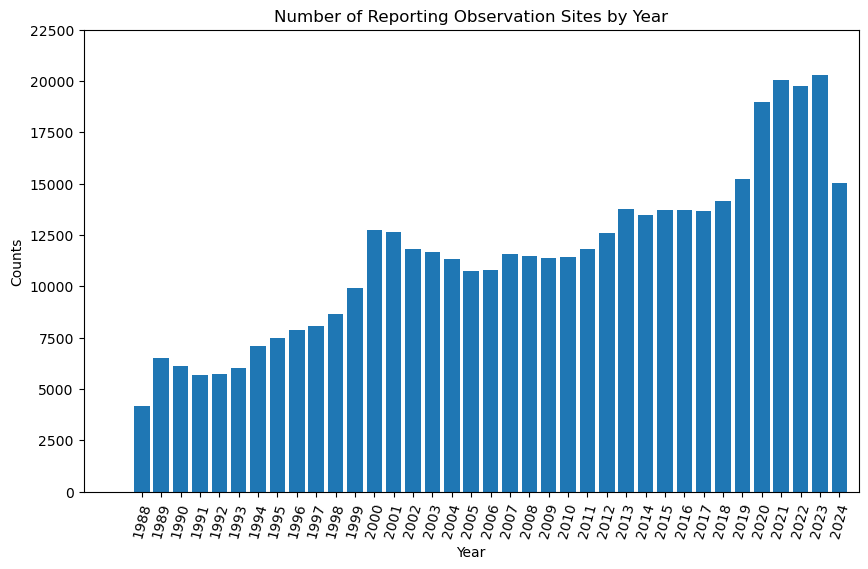

In [278]:
year = loc_counts_df['YEAR']
locs_per_year = loc_counts_df['LOCATION_COUNTS']

plt.figure(figsize=(10, 6))
plt.bar(year, locs_per_year, data=loc_counts_df)
plt.axis([1985, 2025, 0, locs_per_year.max()])
ax = plt.subplot()
ax.set_xticks(year)
ax.set_xticklabels(year, rotation=75, ha="center")
ax.set_yticks(np.arange(0,max(locs_per_year)+2500, 2500))
plt.title('Number of Reporting Observation Sites by Year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.show()

### Are we onto something?
Let's put the counts together in a quick-and-dirty visualization. Since the birds far outnumber the FeederWatch participants, some scaling will be in order to give us a clearer overview.

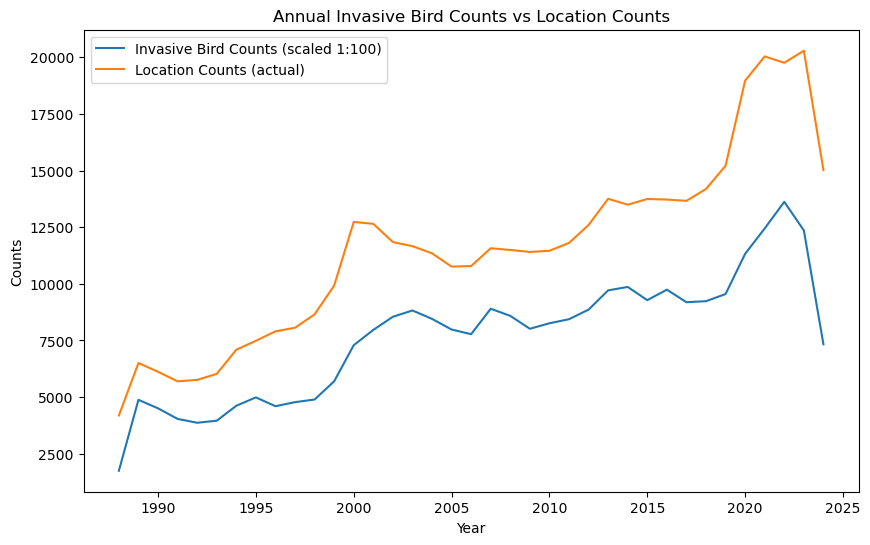

In [289]:
# line plot observations sites with species counts

inv_count = invasive.groupby(['YEAR']).agg(COUNTS = ('TOTAL_COUNTED', 'sum')).reset_index()

x_ticks = range(1990, 2026, 5)

plt.figure(figsize=(10, 6))
ax = plt.subplot()
plt.plot(inv_count['YEAR'], inv_count['COUNTS']/100, label = 'Invasive Bird Counts (scaled 1:100)')
plt.plot(loc_counts_df['YEAR'], loc_counts_df['LOCATION_COUNTS'], label = 'Location Counts (actual)')
ax.set_xticks(x_ticks)
plt.title('Annual Invasive Bird Counts vs Location Counts')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend()
plt.show()

### While the lines do appear to run relatively parallel, there still appears to be a sharp relative decline in reported invasive species between 2022 and 2023, even with more FeederWatch participants to count them.

<Figure size 1000x600 with 0 Axes>

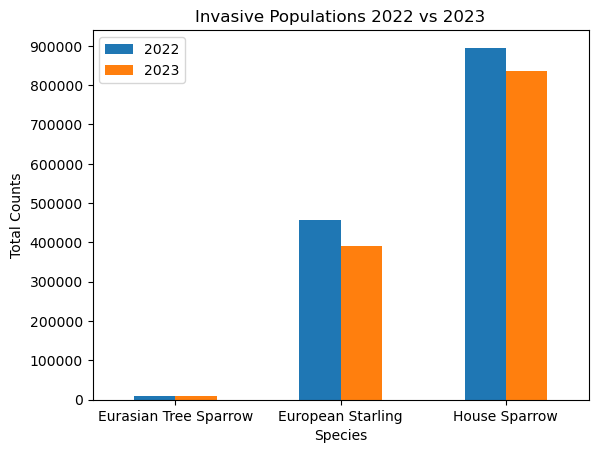

In [280]:
invasive_22_23 = invasive[(invasive['YEAR'] == 2022) | (invasive['YEAR'] == 2023)]

inv_by_year_pivot = pd.pivot_table(invasive_22_23,
    values='TOTAL_COUNTED',
    index='COMMON_NAME',
    columns='YEAR',
    aggfunc='sum').reset_index()

x_lablels = ['Eurasian Tree Sparrow', 'European Starling', 'House Sparrow']

plt.figure(figsize=(10, 6))
inv_by_year_pivot.plot(kind='bar')
ax = plt.subplot()
ax.set_xticklabels(x_lablels, rotation=0, ha="center")
ax.set_yticks(np.arange(0,1000000, 100000))
plt.legend()
plt.title('Invasive Populations 2022 vs 2023')
plt.xlabel('Species')
plt.ylabel('Total Counts')
plt.show()

### Let's see some actual numbers.
#### First, the birds.

In [281]:
invasive_22 = invasive[(invasive['YEAR'] == 2022)]
invasive_22 = invasive_22.groupby(['COMMON_NAME', 'YEAR']).agg(TOTALS = ('TOTAL_COUNTED', 'sum')).reset_index()
invasive_23 = invasive[(invasive['YEAR'] == 2023)]
invasive_23 = invasive_23.groupby(['COMMON_NAME', 'YEAR']).agg(TOTALS = ('TOTAL_COUNTED', 'sum')).reset_index()
invasive_22_23_merged = invasive_22.merge(invasive_23, on='COMMON_NAME', how='inner', suffixes=('_2022', '_2023'))
invasive_22_23_merged['DIFFERENCE'] = invasive_22_23_merged['TOTALS_2023'] - invasive_22_23_merged['TOTALS_2022']
invasive_22_23_merged['%_DIFFERENCE'] = (invasive_22_23_merged['DIFFERENCE'] / invasive_22_23_merged['TOTALS_2022']) * 100
invasive_22_23_merged = invasive_22_23_merged[['COMMON_NAME', 'TOTALS_2022', 'TOTALS_2023', 'DIFFERENCE', '%_DIFFERENCE']]

invasive_22_23_merged.head()

,COMMON_NAME,TOTALS_2022,TOTALS_2023,DIFFERENCE,%_DIFFERENCE
0,Eurasian Tree Sparrow,9258.0,8601.0,-657.0,-7.096565
1,European Starling,457245.0,390854.0,-66391.0,-14.519787
2,House Sparrow,895267.0,836090.0,-59177.0,-6.609983


#### Total count differences

In [282]:
invasive_diff_total = invasive_22_23_merged['DIFFERENCE'].sum()
invasive_diff_percent_total = invasive_22_23_merged['%_DIFFERENCE'].sum()
invasive_diff_total, invasive_diff_percent_total

(-126225.0, -28.226335508383478)

#### Now the FeederWatch participants.
Our line chart shows that 2023 had the most participants on record. Let's see how many more than in the previous year.

In [283]:
fw_participants_2022 = loc_counts_df[loc_counts_df['YEAR'] == 2022]['LOCATION_COUNTS'].item() 
fw_participants_2023 = loc_counts_df[loc_counts_df['YEAR'] == 2023]['LOCATION_COUNTS'].item()
diff = fw_participants_2023 - fw_participants_2022
percent_diff = diff / fw_participants_2022 * 100

fw_participants_2023, fw_participants_2022, diff, percent_diff

(20289, 19757, 532, 2.6927165055423394)

---
#### In 2023, 524 *more* FeederWatch participants counted a total of 126,225 *fewer* invasive cavity nesting birds than were counted in 2022.
---

#### Let's take a closer look at Eurasian Tree Sparrows.

In [ ]:
# TRENDS?


# insert line chart here

In [ ]:
# native population decline in 2023?